In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
rc('font', family='HCR Dotum')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from datetime import timedelta
from make_metrics import nmae

--------------------------------------------------------------------------------

### AutoML

In [22]:
from pycaret.regression import *

In [27]:
from skopt import BayesSearchCV

In [49]:
from pycaret.datasets import get_data
boston = get_data('boston')
from pycaret.regression import *
exp_name = setup(data = boston,  target = 'medv')
best_model = compare_models() # 디폴드 모델들

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2443,10.4235,3.1394,0.8628,0.1420,0.1122,0.0200
xgboost,Extreme Gradient Boosting,2.3311,10.9387,3.2474,0.8505,0.1431,0.1129,0.1870
rf,Random Forest Regressor,2.3256,11.8209,3.3453,0.8485,0.1464,0.1151,0.0670
et,Extra Trees Regressor,2.2444,12.2970,3.3890,0.8447,0.1448,0.1104,0.0500
lightgbm,Light Gradient Boosting Machine,2.4903,13.4614,3.5806,0.8285,0.1495,0.1182,0.0230
ada,AdaBoost Regressor,2.9956,16.4740,3.9502,0.7867,0.1818,0.1584,0.0270
dt,Decision Tree Regressor,2.9357,18.9896,4.2723,0.7513,0.1937,0.1485,0.0050
lr,Linear Regression,3.5076,26.1039,5.0076,0.6686,0.2370,0.1718,0.0050
ridge,Ridge Regression,3.4901,26.1432,5.0028,0.6679,0.2332,0.1715,0.0050
br,Bayesian Ridge,3.5052,26.5089,5.0219,0.6660,0.2299,0.1713,0.0050


In [50]:
# estimator 지정
# 원하는 모델들 중 RMSE가 가장 낮은 3개
compare_models(include = ['lr', 'lasso', 'ridge', 'en', 'br', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada', 'gbr', 'mlp', 'lightgbm'],sort = 'RMSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2443,10.4235,3.1394,0.8628,0.1420,0.1122,0.0200
rf,Random Forest Regressor,2.3256,11.8209,3.3453,0.8485,0.1464,0.1151,0.0630
et,Extra Trees Regressor,2.2444,12.2970,3.3890,0.8447,0.1448,0.1104,0.0520
lightgbm,Light Gradient Boosting Machine,2.4903,13.4614,3.5806,0.8285,0.1495,0.1182,0.0350
ada,AdaBoost Regressor,2.9956,16.4740,3.9502,0.7867,0.1818,0.1584,0.0220
dt,Decision Tree Regressor,2.9357,18.9896,4.2723,0.7513,0.1937,0.1485,0.0050
ridge,Ridge Regression,3.4901,26.1432,5.0028,0.6679,0.2332,0.1715,0.0050
lr,Linear Regression,3.5076,26.1039,5.0076,0.6686,0.2370,0.1718,0.0050
br,Bayesian Ridge,3.5052,26.5089,5.0219,0.6660,0.2299,0.1713,0.0060
kr,Kernel Ridge,3.5078,28.4956,5.1899,0.6417,0.2487,0.1815,0.0110


[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8430, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_s

In [52]:
# Default
best_2 = compare_models(sort = 'RMSE', n_select = 2)
tuned_best2 = [tune_model(i, search_library="scikit-optimize") for i in best_2]
tuned_best2

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5581,15.1993,3.8986,0.8425,0.1365,0.0972
1,2.5573,11.9359,3.4548,0.8994,0.1712,0.1465
2,3.2047,21.4109,4.6272,0.7069,0.1706,0.1272
3,3.1559,25.4432,5.0441,0.7403,0.1980,0.1492
4,2.6956,11.6243,3.4094,0.7051,0.1935,0.1697
5,2.3064,9.0196,3.0033,0.8838,0.1311,0.1092
6,2.0665,7.4058,2.7214,0.8196,0.0975,0.0817
7,2.6924,13.2788,3.6440,0.8277,0.1683,0.1301
8,2.0699,7.3901,2.7185,0.9264,0.1476,0.1183
9,2.5849,14.1711,3.7645,0.8514,0.1385,0.1164


[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.03278866312992302,
                           loss='ls', max_depth=4,
                           max_features=0.8425152273776737, max_leaf_nodes=None,
                           min_impurity_decrease=0.025853917522597795,
                           min_impurity_split=None, min_samples_leaf=2,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=135, n_iter_no_change=None,
                           presort='deprecated', random_state=8430,
                           subsample=0.7703419799041586, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8698963036041494, gamma=0,
              gpu_id=-1, importance_type='gain', interactio

In [53]:
blender = blend_models(tuned_best2) # 보팅
stacker = stack_models(tuned_best2) # 스태킹
best_rmse_model = automl(optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0960,9.6039,3.0990,0.9005,0.1021,0.0798
1,2.2879,9.0012,3.0002,0.9241,0.1607,0.1372
2,2.3065,11.7516,3.4281,0.8391,0.1250,0.0898
3,2.8011,21.3267,4.6181,0.7823,0.1967,0.1456
4,2.5869,10.8872,3.2996,0.7238,0.2229,0.1682
5,2.4312,9.7028,3.1149,0.8750,0.1318,0.1127
6,1.7318,4.8750,2.2079,0.8813,0.0942,0.0738
7,2.1296,7.2152,2.6861,0.9064,0.1364,0.1088
8,1.7766,5.8930,2.4276,0.9413,0.2361,0.1034
9,2.4924,11.0005,3.3167,0.8847,0.1255,0.1118


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.0969,7.2970,2.7013,0.9126,0.1446,0.1161


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.0969,7.2970,2.7013,0.9126,0.1446,0.1161


Text(0, 0.5, 'Pred')

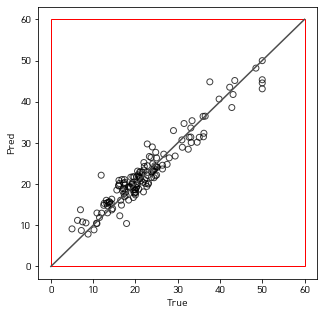

In [63]:
# 그림으로 예측결과 확인
import matplotlib.patches as patches
fig, sub= plt.subplots(figsize = (5, 5))
sub.scatter(predict_model(blender)["medv"], predict_model(blender)["Label"], lw = 1., ec = 'k', fc = 'None', alpha = .75)
sub.add_patch(patches.Rectangle((0, 0),60,60,edgecolor = 'red',fill=False) )
sub.plot([0,60],[0,60], ls="-", c=".3")
sub.set_xlabel('True')
sub.set_ylabel('Pred')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.1564,8.5342,2.9213,0.8978,0.1856,0.1161


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.1564,8.5342,2.9213,0.8978,0.1856,0.1161


Text(0, 0.5, 'Pred')

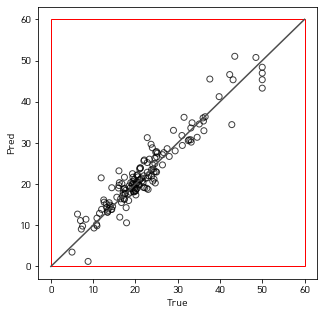

In [66]:
# 그림으로 예측결과 확인
import matplotlib.patches as patches
fig, sub= plt.subplots(figsize = (5, 5))
sub.scatter(predict_model(stacker)["medv"], predict_model(stacker)["Label"], lw = 1., ec = 'k', fc = 'None', alpha = .75)
sub.add_patch(patches.Rectangle((0, 0),60,60,edgecolor = 'red',fill=False) )
sub.plot([0,60],[0,60], ls="-", c=".3")
sub.set_xlabel('True')
sub.set_ylabel('Pred')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.0724,7.4141,2.7229,0.9112,0.1432,0.1145


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.0724,7.4141,2.7229,0.9112,0.1432,0.1145


Text(0, 0.5, 'Pred')

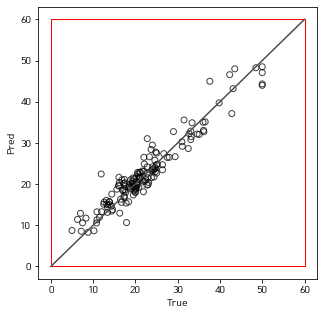

In [67]:
# 그림으로 예측결과 확인
import matplotlib.patches as patches
fig, sub= plt.subplots(figsize = (5, 5))
sub.scatter(predict_model(best_rmse_model)["medv"], predict_model(best_rmse_model)["Label"], lw = 1., ec = 'k', fc = 'None', alpha = .75)
sub.add_patch(patches.Rectangle((0, 0),60,60,edgecolor = 'red',fill=False) )
sub.plot([0,60],[0,60], ls="-", c=".3")
sub.set_xlabel('True')
sub.set_ylabel('Pred')